# CREATING A SPARK SESSION

In [1]:
import findspark
findspark.init(r'C:\spark')
import pyspark
from pyspark.sql import SparkSession as ss
from pyspark.sql.functions import col
spark = ss.builder.appName('analysis').getOrCreate()

# Q1 LOADING THE DATASET

In [2]:
df = spark.read.csv(r"C:\Users\olaol\OneDrive\Desktop\SEM B\BIG DATA\Restaurant_revenue.csv", header = True, inferSchema = True)
df.show(5)

+-------------------+------------------+------------------+------------+-------------------------+----------+-------+------------------+
|Number_of_Customers|        Menu_Price|   Marketing_Spend|Cuisine_Type|Average_Customer_Spending|Promotions|Reviews|   Monthly_Revenue|
+-------------------+------------------+------------------+------------+-------------------------+----------+-------+------------------+
|                 61|43.117635487099676|12.663792520269281|    Japanese|        36.23613252393598|         0|     45| 350.9120399867156|
|                 24| 40.02007699061254| 4.577892096932272|     Italian|        17.95256243749612|         0|     36| 221.3190913292622|
|                 81| 41.98148523678063|4.6529107712536195|    Japanese|       22.600420287336984|         1|     91|326.52976287588587|
|                 70| 43.00530706771189| 4.416052595712783|     Italian|       18.984097602995394|         1|     59|348.19057312560795|
|                 30|17.456199471525764| 

# DATA PREPROCESSING

In [3]:
df.printSchema()

root
 |-- Number_of_Customers: integer (nullable = true)
 |-- Menu_Price: double (nullable = true)
 |-- Marketing_Spend: double (nullable = true)
 |-- Cuisine_Type: string (nullable = true)
 |-- Average_Customer_Spending: double (nullable = true)
 |-- Promotions: integer (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Monthly_Revenue: double (nullable = true)



In [4]:
df.columns

['Number_of_Customers',
 'Menu_Price',
 'Marketing_Spend',
 'Cuisine_Type',
 'Average_Customer_Spending',
 'Promotions',
 'Reviews',
 'Monthly_Revenue']

In [5]:
features = len(df.columns)
print(f' Number of features in the dataset: {features} features')


 Number of features in the dataset: 8 features


In [6]:
rows = df.count()
print(f'Number of instances in the dataset {rows} instances')

Number of instances in the dataset 1000 instances


In [7]:
missing_values = {column: df.where(col(column).isNull()).count() for column in df.columns}
for key, values in missing_values.items():
    print(f' number of missing values in {key} is {values}')


 number of missing values in Number_of_Customers is 0
 number of missing values in Menu_Price is 0
 number of missing values in Marketing_Spend is 0
 number of missing values in Cuisine_Type is 0
 number of missing values in Average_Customer_Spending is 0
 number of missing values in Promotions is 0
 number of missing values in Reviews is 0
 number of missing values in Monthly_Revenue is 0


In [8]:
# total sum of missing values
total_missing_values = sum(missing_values.values())
print(f'total sum of missing values is {total_missing_values}')

total sum of missing values is 0


In [9]:
# DESCRIPTIVE STATISTICS OF ALL NUMERICAL FEATURES
stat =df.describe('Number_of_Customers','Menu_Price','Marketing_Spend','Average_Customer_Spending','Promotions', 'Reviews','Monthly_Revenue')

In [10]:
stat.show()

+-------+-------------------+------------------+--------------------+-------------------------+------------------+-----------------+-------------------+
|summary|Number_of_Customers|        Menu_Price|     Marketing_Spend|Average_Customer_Spending|        Promotions|          Reviews|    Monthly_Revenue|
+-------+-------------------+------------------+--------------------+-------------------------+------------------+-----------------+-------------------+
|  count|               1000|              1000|                1000|                     1000|              1000|             1000|               1000|
|   mean|             53.271|30.219120192362492|   9.958725936364628|       29.477084922525954|             0.497|           49.837|  268.7241722980484|
| stddev|  26.36491357216382|11.278759730211174|   5.845586448299478|       11.471685815052977|0.5002411830719671|29.22633418014666|  103.9829499680257|
|    min|                 10|10.009500943035384|0.003767991131637949|       10.037

In [11]:
# SCATTER PLOT SHOWING RELATIONSHIP OF ALL NUMERICAL FEATURES AGAINST THE TARGET FEATURE(MONTHLY REVENUE)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

In [13]:
numerical_features = df.select('Number_of_Customers','Menu_Price','Marketing_Spend','Average_Customer_Spending','Promotions', 'Reviews', 'Monthly_Revenue')
numerical_df= numerical_features.toPandas()


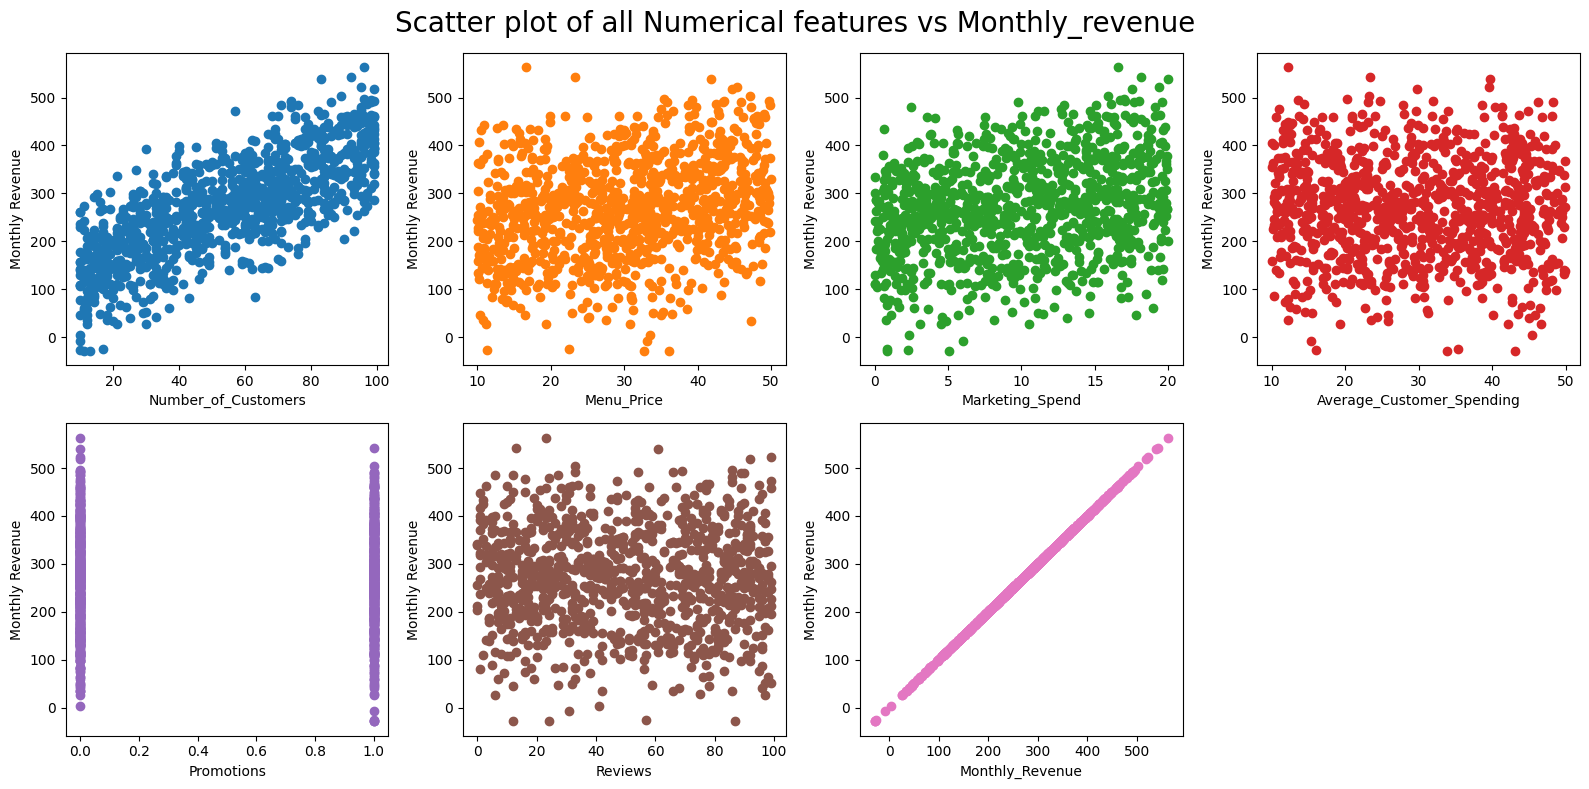

In [14]:
fig, axs = plt.subplots(2,4, figsize = (16,8))
axs = axs.flatten()
colors = cm.tab10.colors
for i, column in enumerate(numerical_df):
    axs[i].scatter(x= numerical_df[column], y= numerical_df['Monthly_Revenue'], color=colors[i])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Monthly Revenue')
    axs[-1].axis('off')
plt.suptitle('Scatter plot of all Numerical features vs Monthly_revenue', fontsize = 20)
plt.tight_layout()

In [15]:
# CORRELATION MATRIX

In [16]:
correlation_matrix = numerical_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                           Number_of_Customers  Menu_Price  Marketing_Spend  \
Number_of_Customers                   1.000000    0.033470        -0.007024   
Menu_Price                            0.033470    1.000000         0.016319   
Marketing_Spend                      -0.007024    0.016319         1.000000   
Average_Customer_Spending            -0.013898    0.020808        -0.058586   
Promotions                            0.058693    0.022068        -0.041838   
Reviews                              -0.010140    0.003792        -0.031470   
Monthly_Revenue                       0.745239    0.259579         0.269929   

                           Average_Customer_Spending  Promotions   Reviews  \
Number_of_Customers                        -0.013898    0.058693 -0.010140   
Menu_Price                                  0.020808    0.022068  0.003792   
Marketing_Spend                            -0.058586   -0.041838 -0.031470   
Average_Customer_Spending          

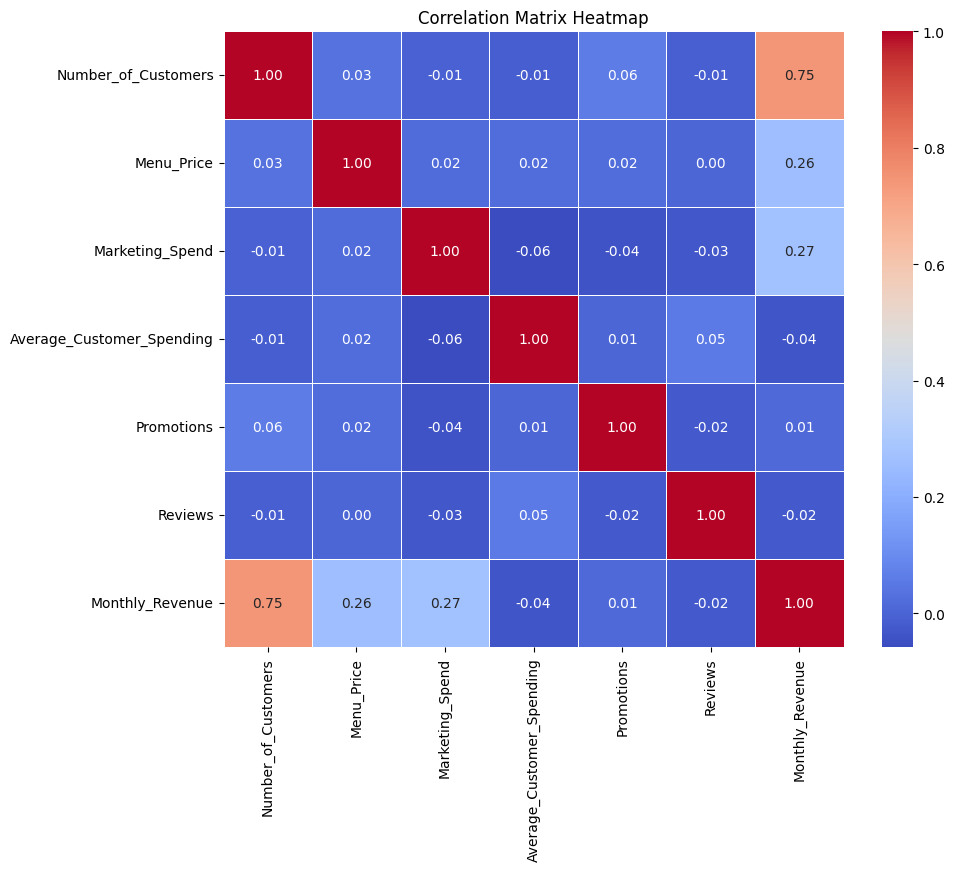

In [17]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
# DISTRIBUTION OF ALL NUMERICAL FEATURES USING MATPLOTLIB

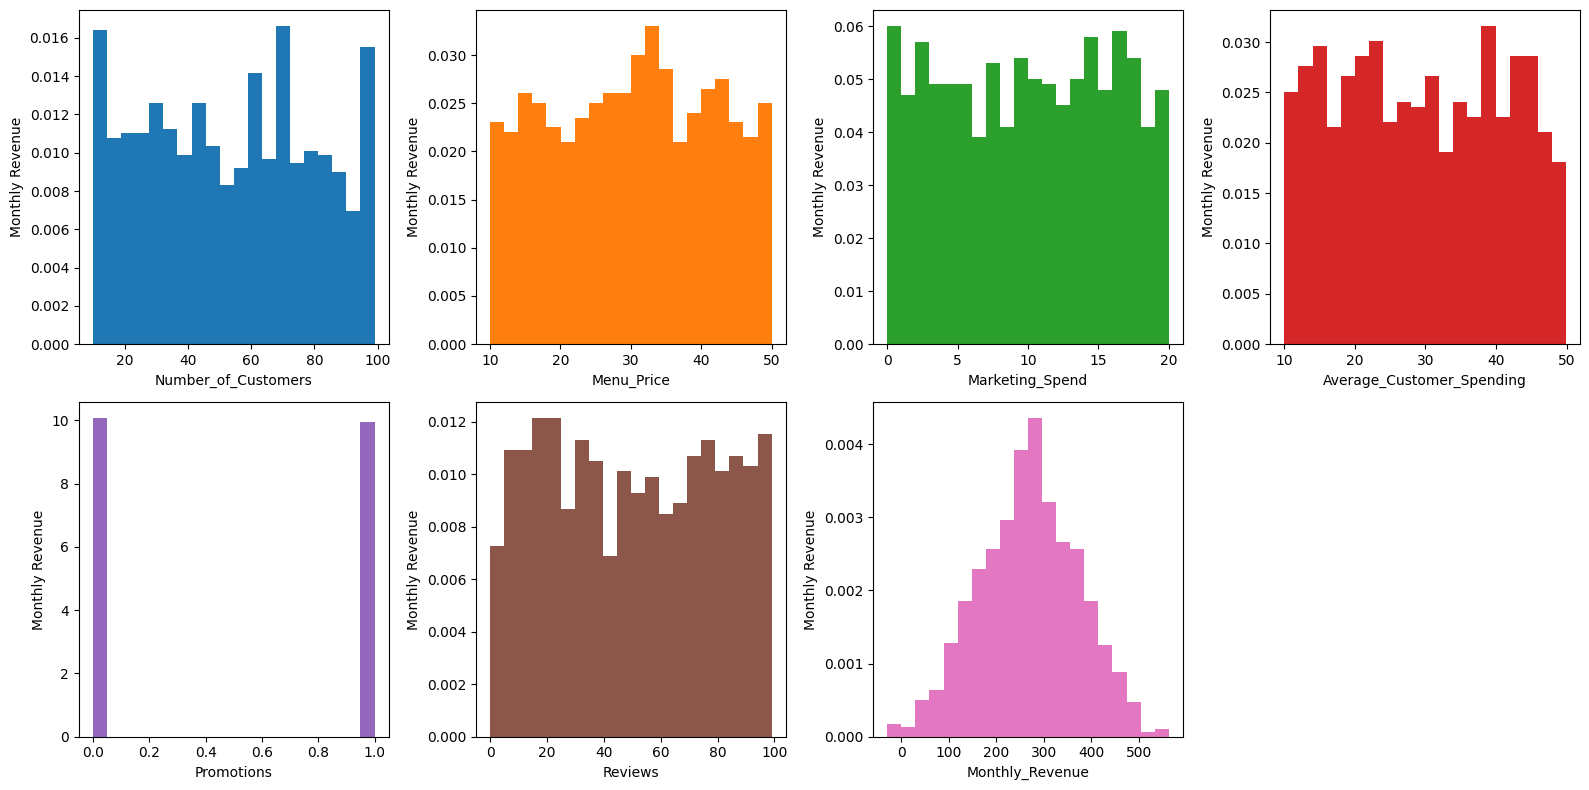

In [19]:
fig, axs = plt.subplots(2,4, figsize = (16,8))
axs = axs.flatten()
colors = cm.tab10.colors
for i, column in enumerate(numerical_df):
    axs[i].hist(numerical_df[column], color=colors[i], bins = 20, density = True)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Monthly Revenue')
    axs[-1].axis('off')
plt.tight_layout()

In [20]:
# DISTRIBUTION OF ALL NUMERICAL FEATURES USING SEABORN

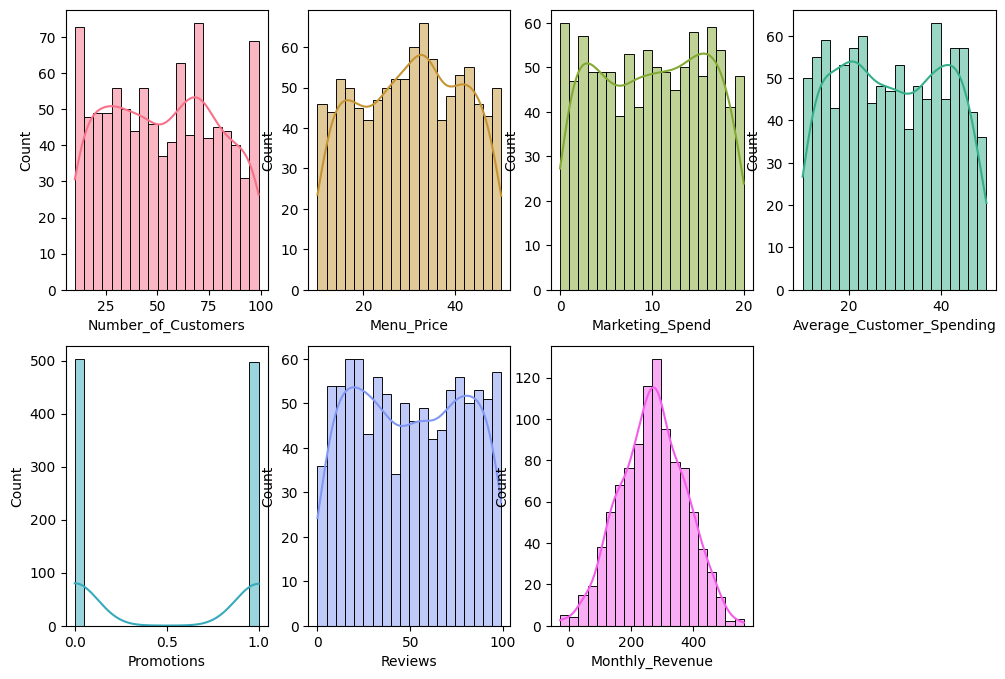

In [21]:
plt.figure(figsize = (12,8))
colors = sns.color_palette(palette = 'husl', n_colors = len(numerical_df.columns))
for i, column in enumerate(numerical_df):
    plt.subplot(2,4, i +1)
    sns.histplot(numerical_df[column], color = colors[i], bins = 20, kde = True)

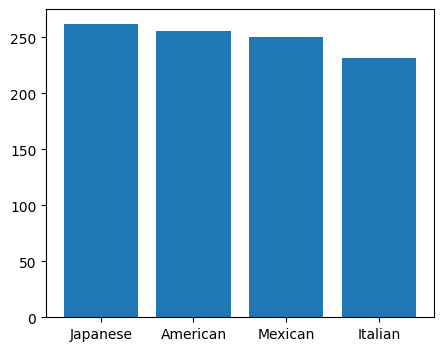

In [22]:
# BAR CHART FOR THE ONLY CATEGORICAL FEARURE IN THE DATASET - CUISINE_TYPE
cuisine = df.select('Cuisine_Type').toPandas()
plt.figure(figsize=(5,4))
plt.bar(cuisine['Cuisine_Type'].value_counts().index, cuisine['Cuisine_Type'].value_counts().values)
plt.show()


# QUESTION 2 - FEATURE VECTOR SEPERATING ALL FEATURES FROM THE TARGET FEATURE(MONTHLY_REVENUE)

In [23]:
# CONVERTING CUISINE_TYPE TO NUMERICAL FEATURE

In [24]:
from pyspark.ml.feature import VectorAssembler, StringIndexer

In [25]:
stringindexer = StringIndexer(inputCol='Cuisine_Type',outputCol ='Cuisine_Type_indexed')
new_df =stringindexer.fit(df).transform(df)

In [26]:
new_df.select('Cuisine_Type', 'Cuisine_Type_indexed').show(5)

+------------+--------------------+
|Cuisine_Type|Cuisine_Type_indexed|
+------------+--------------------+
|    Japanese|                 0.0|
|     Italian|                 3.0|
|    Japanese|                 0.0|
|     Italian|                 3.0|
|     Italian|                 3.0|
+------------+--------------------+
only showing top 5 rows



In [27]:
inputcol = ['Number_of_Customers', 'Menu_Price','Marketing_Spend','Average_Customer_Spending','Promotions','Reviews','Cuisine_Type_indexed']
featurevector = VectorAssembler(inputCols = inputcol, outputCol = 'Independent Features')
final_df = featurevector.transform(new_df)


In [28]:
final_df.select('Independent Features', 'Monthly_Revenue').show(10, truncate = False)

+----------------------------------------------------------------------------+------------------+
|Independent Features                                                        |Monthly_Revenue   |
+----------------------------------------------------------------------------+------------------+
|[61.0,43.117635487099676,12.663792520269281,36.23613252393598,0.0,45.0,0.0] |350.9120399867156 |
|[24.0,40.02007699061254,4.577892096932272,17.95256243749612,0.0,36.0,3.0]   |221.3190913292622 |
|[81.0,41.98148523678063,4.6529107712536195,22.600420287336984,1.0,91.0,0.0] |326.52976287588587|
|[70.0,43.00530706771189,4.416052595712783,18.984097602995394,1.0,59.0,3.0]  |348.19057312560795|
|[30.0,17.456199471525764,3.47505191324589,12.766142708740048,1.0,30.0,3.0]  |185.0091205967936 |
|[92.0,19.42766984259999,13.114473451233126,43.099949665426934,1.0,10.0,1.0] |399.8675067311068 |
|[96.0,35.35034254880709,16.96031770498803,20.181621716866445,0.0,86.0,1.0]  |496.6536867303593 |
|[84.0,46.3146452185

# Q3 - SPLITTING THE DATASET TO 70% TRAINING AND 30% TEST

In [29]:
output = final_df.select('Independent Features', 'Monthly_Revenue')

In [30]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator


In [31]:
train_data, test_data = output.randomSplit([0.7,0.3], seed = 123)

# Q4 - TRAINING A LINEAR REGRESSION

In [32]:
restaurant_lr = LinearRegression(featuresCol='Independent Features', labelCol='Monthly_Revenue')

In [33]:
# FIT LINEAR REGRESSION ON TRAIN DATA
trained_model = restaurant_lr.fit(train_data)

# Q5 - PERFORMANCE EVALUATION ON TRAIN AND TEST DATA

In [34]:
# Evaluate the model
train_results = trained_model.evaluate(train_data)
test_results = trained_model.evaluate(test_data)

In [35]:
# PERFORMANCE ON TRAIN SET
mean_absolute_error = train_results.meanAbsoluteError
root_mean_squared_error = train_results.rootMeanSquaredError
mean_squared_error = train_results.meanSquaredError
print(f'MEAN ABSOLUTE ERROR FOR TRAIN DATA IS {mean_absolute_error}')
print(f'ROOT MEAN SQUARED ERROR FOR TRAIN DATA IS {root_mean_squared_error}')
print(f'MEAN SQUARED ERROR FOR TRAIN DATA IS {mean_squared_error}')

MEAN ABSOLUTE ERROR FOR TRAIN DATA IS 47.16327270601739
ROOT MEAN SQUARED ERROR FOR TRAIN DATA IS 59.078780259515085
MEAN SQUARED ERROR FOR TRAIN DATA IS 3490.3022769520694


In [36]:
# PERFORMANCE ON TEST SET
mean_absolute_error = test_results.meanAbsoluteError
root_mean_squared_error = test_results.rootMeanSquaredError
mean_squared_error = test_results.meanSquaredError
print(f'MEAN ABSOLUTE ERROR FOR TEST DATA IS {mean_absolute_error}')
print(f'ROOT MEAN SQUARED ERROR FOR TEST DATA IS {root_mean_squared_error}')
print(f'MEAN SQUARED ERROR FOR TEST DATA IS {mean_squared_error}')

MEAN ABSOLUTE ERROR FOR TEST DATA IS 45.56020661086208
ROOT MEAN SQUARED ERROR FOR TEST DATA IS 56.95891653269566
MEAN SQUARED ERROR FOR TEST DATA IS 3244.3181725785907


# Q6 - TABLE SHOWING PREDICTED AND ACTUAL FOR TEST DATA

In [37]:
# prediction for test_data
test_prediction = trained_model.transform(test_data)
test_prediction.show(10)

# ALTERNATIVELY USING PANDAS
test_df = test_prediction.toPandas()
test_df

+--------------------+------------------+------------------+
|Independent Features|   Monthly_Revenue|        prediction|
+--------------------+------------------+------------------+
|[10.0,16.24655379...|109.30955404327938| 91.76734628945172|
|[10.0,25.96183784...|178.12400694669526|150.84391441708493|
|[10.0,33.08740946...|-7.627381568388813|126.17338838709219|
|[10.0,35.51940823...|  261.672130979975|156.65448323067392|
|[10.0,37.32735425...|236.44968114716335| 175.1039092635235|
|[11.0,15.29104844...|138.26964515466435| 66.50234848148406|
|[11.0,26.86815738...|136.87810960978817|152.48871638657067|
|[11.0,34.96406176...|117.15332925629589|  125.190708550441|
|[11.0,36.65227543...| 272.9846977648746| 193.6276230144002|
|[12.0,10.36121616...|45.963395322878995|149.50676113742804|
+--------------------+------------------+------------------+
only showing top 10 rows



,Independent Features,Monthly_Revenue,prediction
0,"[10.0, 16.246553791686956, 4.938148533351711, ...",109.309554,91.767346
1,"[10.0, 25.961837845484443, 15.18702051505226, ...",178.124007,150.843914
2,"[10.0, 33.08740946846993, 6.009787712008647, 1...",-7.627382,126.173388
3,"[10.0, 35.5194082317319, 12.641796590124844, 4...",261.672131,156.654483
4,"[10.0, 37.32735425781925, 12.04291288104962, 1...",236.449681,175.103909
...,...,...,...
308,"[99.0, 10.48812289272178, 5.5873542786943275, ...",433.177288,337.649927
309,"[99.0, 35.280619440816736, 14.395829067093722,...",386.298202,442.689045
310,"[99.0, 36.05468843952984, 10.17158578895157, 3...",363.238137,410.245777
311,"[99.0, 38.197021987558124, 0.9968405556588311,...",356.141401,376.061388


# TABLE SHOWING PREDICTION AND ACTUAL FOR TRAINING DATA

In [38]:
# train data
train_prediction = trained_model.transform(train_data)
train_prediction.show(10)

# ALTERNATIVELY USING PANDAS
train_df = train_prediction.toPandas()
train_df

+--------------------+------------------+------------------+
|Independent Features|   Monthly_Revenue|        prediction|
+--------------------+------------------+------------------+
|[10.0,11.31386680...|-27.61027600806937|62.341918164541745|
|[10.0,13.03733641...|142.67447688474232|134.55295907215552|
|[10.0,16.48055511...| 46.67513578206662| 69.80428346834347|
|[10.0,16.82659034...|139.18023683945498|118.06711934549676|
|[10.0,22.90111911...|107.74970469587976| 138.7260441782926|
|[10.0,28.91567862...|130.31390737059968|165.52975606766947|
|[10.0,31.10590920...| 76.56291267264514|  91.4848419198662|
|[10.0,33.52233512...| 3.819308480642732|109.66073238069455|
|[10.0,33.77583436...| 106.5554468856958|135.88506911303577|
|[10.0,45.05776303...| 157.5936079745852|207.82665563388343|
+--------------------+------------------+------------------+
only showing top 10 rows



,Independent Features,Monthly_Revenue,prediction
0,"[10.0, 11.313866809737533, 2.2791326942863432,...",-27.610276,62.341918
1,"[10.0, 13.037336414784884, 15.604261268602047,...",142.674477,134.552959
2,"[10.0, 16.480555115663385, 1.1227220683242, 40...",46.675136,69.804283
3,"[10.0, 16.826590341999935, 10.939265027427762,...",139.180237,118.067119
4,"[10.0, 22.90111911385661, 13.337333211018434, ...",107.749705,138.726044
...,...,...,...
682,"[99.0, 43.61809625107734, 18.00642536148543, 3...",492.305464,466.426651
683,"[99.0, 44.72491253962124, 17.54523525652359, 2...",518.327003,475.161471
684,"[99.0, 46.14895868701082, 15.966883764486566, ...",459.069742,465.798120
685,"[99.0, 46.62054709167656, 4.058727351498044, 1...",404.502210,407.384488


# SCATTER PLOT FOR TEST DATA ACTUAL VS PREDICTED

In [39]:
test_df = test_prediction.select('Monthly_Revenue', 'prediction').toPandas()

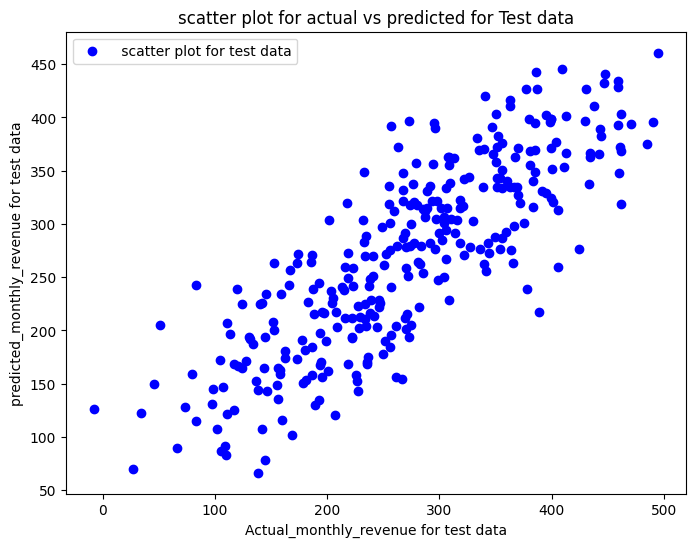

In [40]:
plt.figure(figsize = (8,6))
plt.scatter(x=test_df['Monthly_Revenue'], y= test_df['prediction'], color = 'blue', label = ' scatter plot for test data')
plt.xlabel('Actual_monthly_revenue for test data')
plt.ylabel('predicted_monthly_revenue for test data')
plt.title('scatter plot for actual vs predicted for Test data')
plt.legend()
plt.show()

# FITTING A LINEAR REGRESSION LINE FOR TEST DATA

In [41]:
import numpy as np

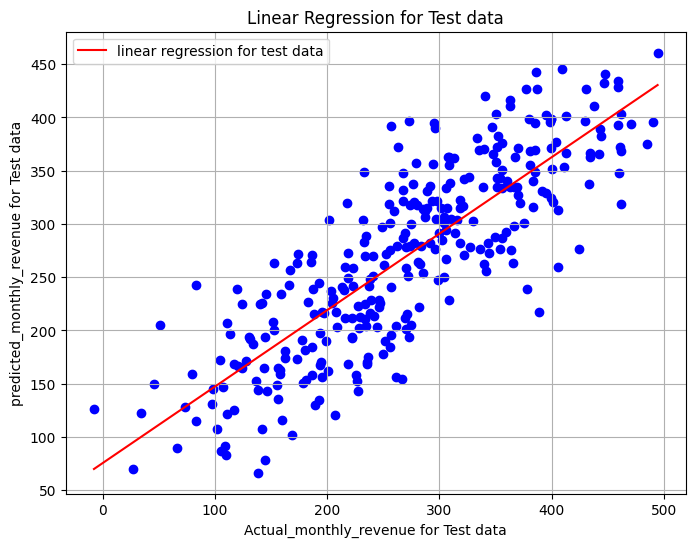

In [42]:
plt.figure(figsize = (8,6))
x= test_df['Monthly_Revenue']
y = test_df['prediction']
xmin= test_df['Monthly_Revenue'].min()
xmax = test_df['Monthly_Revenue'].max()
x_dense_values = np.linspace(xmin, xmax, 100)
slope, intercept = np.polyfit(x,y,1)
y_dense_values = slope*x_dense_values + intercept
plt.scatter(x=test_df['Monthly_Revenue'], y= test_df['prediction'], color = 'blue')
plt.plot(x_dense_values, y_dense_values, color = 'red', label = 'linear regression for test data')
plt.xlabel('Actual_monthly_revenue for Test data')
plt.ylabel('predicted_monthly_revenue for Test data')
plt.title('Linear Regression for Test data')
plt.legend()
plt.grid(True)


# SCATTER PLOT FOR TRAIN DATA ACTUAL VS PREDICTED

In [43]:
train_df = train_prediction.select('Monthly_Revenue', 'prediction').toPandas()

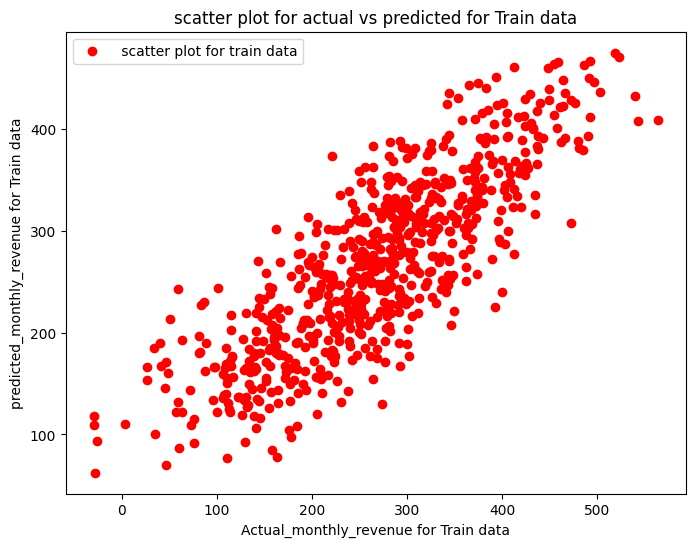

In [44]:
plt.figure(figsize = (8,6))
plt.scatter(x=train_df['Monthly_Revenue'], y= train_df['prediction'], color = 'red', label = ' scatter plot for train data')
plt.xlabel('Actual_monthly_revenue for Train data')
plt.ylabel('predicted_monthly_revenue for Train data')
plt.title('scatter plot for actual vs predicted for Train data')
plt.legend()

# FITTING A LINEAR REGRESSION LINE FOR TRAIN DATA

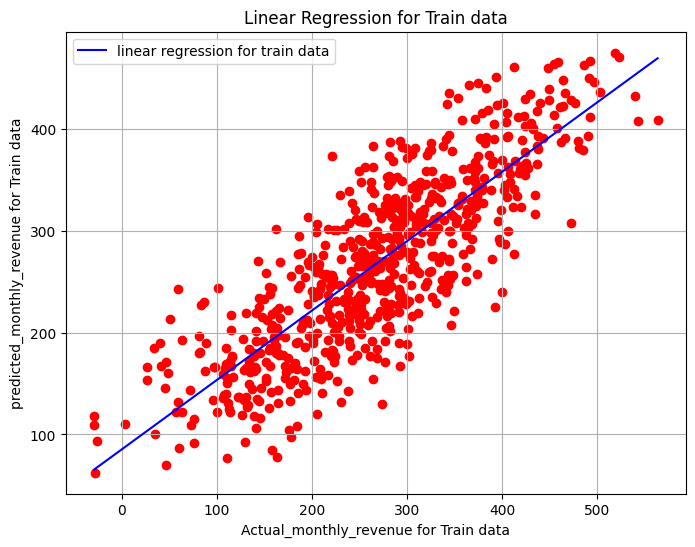

In [45]:
plt.figure(figsize = (8,6))
x= train_df['Monthly_Revenue']
y = train_df['prediction']
xmin= train_df['Monthly_Revenue'].min()
xmax = train_df['Monthly_Revenue'].max()
x_dense_values = np.linspace(xmin, xmax, 100)
slope, intercept = np.polyfit(x,y,1)
y_dense_values = slope*x_dense_values + intercept
plt.scatter(x=train_df['Monthly_Revenue'], y= train_df['prediction'], color = 'red')
plt.plot(x_dense_values, y_dense_values, color = 'blue', label = 'linear regression for train data')
plt.xlabel('Actual_monthly_revenue for Train data')
plt.ylabel('predicted_monthly_revenue for Train data')
plt.title('Linear Regression for Train data')
plt.legend()
plt.grid(True)

# FEATURE SELECTION

In [57]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor
from pyspark.ml import Pipeline

# Define features vector
feature_columns = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 
                   'Average_Customer_Spending', 'Promotions', 'Reviews']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Random Forest model
rf = RandomForestRegressor(featuresCol='features', labelCol='Monthly_Revenue')
rf_pipeline = Pipeline(stages=[assembler, rf])
rf_model = rf_pipeline.fit(df)

# Gradient Boosted Trees model
gbt = GBTRegressor(featuresCol='features', labelCol='Monthly_Revenue', maxIter=10)
gbt_pipeline = Pipeline(stages=[assembler, gbt])
gbt_model = gbt_pipeline.fit(df)

# Feature Importance
rf_feature_importance = rf_model.stages[-1].featureImportances
gbt_feature_importance = gbt_model.stages[-1].featureImportances

# Convert feature importance scores to a dictionary for easy visualization
rf_feature_importance_dict = {feature_columns[i]: rf_feature_importance[i] for i in range(len(feature_columns))}
gbt_feature_importance_dict = {feature_columns[i]: gbt_feature_importance[i] for i in range(len(feature_columns))}

print("Random Forest Feature Importance:")
print(rf_feature_importance_dict)

print("\nGradient Boosted Trees Feature Importance:")
print(gbt_feature_importance_dict)


Random Forest Feature Importance:
{'Number_of_Customers': 0.7506203324333742, 'Menu_Price': 0.09504838262621491, 'Marketing_Spend': 0.10597854588541404, 'Average_Customer_Spending': 0.026045378552874483, 'Promotions': 0.002967903787368005, 'Reviews': 0.019339456714754413}

Gradient Boosted Trees Feature Importance:
{'Number_of_Customers': 0.45630965232297716, 'Menu_Price': 0.11202272500207962, 'Marketing_Spend': 0.17278551265138462, 'Average_Customer_Spending': 0.11337713478836964, 'Promotions': 0.011357916651073005, 'Reviews': 0.13414705858411594}


In [47]:
inputcol_important = ['Number_of_Customers', 'Menu_Price','Marketing_Spend']
newfeaturevector = VectorAssembler(inputCols = inputcol_important, outputCol = 'New Independent Features')
important_df = newfeaturevector.transform(new_df)


In [48]:
important_df.select('New Independent Features', 'Monthly_Revenue').show(10, truncate = False)

+--------------------------------------------+------------------+
|New Independent Features                    |Monthly_Revenue   |
+--------------------------------------------+------------------+
|[61.0,43.117635487099676,12.663792520269281]|350.9120399867156 |
|[24.0,40.02007699061254,4.577892096932272]  |221.3190913292622 |
|[81.0,41.98148523678063,4.6529107712536195] |326.52976287588587|
|[70.0,43.00530706771189,4.416052595712783]  |348.19057312560795|
|[30.0,17.456199471525764,3.47505191324589]  |185.0091205967936 |
|[92.0,19.42766984259999,13.114473451233126] |399.8675067311068 |
|[96.0,35.35034254880709,16.96031770498803]  |496.6536867303593 |
|[84.0,46.31464521850064,14.486349393533224] |417.15860671408467|
|[84.0,22.647863291859785,15.841872675210864]|352.148065230514  |
|[97.0,33.53226703180226,8.095968581703996]  |272.7935167604014 |
+--------------------------------------------+------------------+
only showing top 10 rows



In [49]:
new_output = important_df.select('New Independent Features', 'Monthly_Revenue')

In [50]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [51]:
new_train_data, new_test_data = new_output.randomSplit([0.7,0.3], seed = 123)

In [52]:
new_restaurant_lr = LinearRegression(featuresCol='New Independent Features', labelCol='Monthly_Revenue')

In [53]:
# FIT LINEAR REGRESSION ON TRAIN DATA
new_trained_model = new_restaurant_lr.fit(new_train_data)

In [54]:
# Evaluate the model
new_train_results = new_trained_model.evaluate(new_train_data)
new_test_results =new_trained_model.evaluate(new_test_data)

In [55]:
# PERFORMANCE ON TRAIN SET
new_mean_absolute_error = new_train_results.meanAbsoluteError
new_root_mean_squared_error = new_train_results.rootMeanSquaredError
new_mean_squared_error = new_train_results.meanSquaredError
print(f'MEAN ABSOLUTE ERROR FOR NEW TRAIN DATA IS {new_mean_absolute_error}')
print(f'ROOT MEAN SQUARED ERROR FOR NEW TRAIN DATA IS {new_root_mean_squared_error}')
print(f'MEAN SQUARED ERROR FOR NEW TRAIN DATA IS {new_mean_squared_error}')

MEAN ABSOLUTE ERROR FOR NEW TRAIN DATA IS 47.303180419490175
ROOT MEAN SQUARED ERROR FOR NEW TRAIN DATA IS 59.30989340506992
MEAN SQUARED ERROR FOR NEW TRAIN DATA IS 3517.6634557207562


In [56]:
# PERFORMANCE ON TEST SET
new_mean_absolute_error = new_test_results.meanAbsoluteError
new_root_mean_squared_error = new_test_results.rootMeanSquaredError
new_mean_squared_error = new_test_results.meanSquaredError
print(f'MEAN ABSOLUTE ERROR FOR NEW TEST DATA IS {new_mean_absolute_error}')
print(f'ROOT MEAN SQUARED ERROR FOR NEW TEST DATA IS {new_root_mean_squared_error}')
print(f'MEAN SQUARED ERROR FOR NEW TEST DATA IS {new_mean_squared_error}')

MEAN ABSOLUTE ERROR FOR NEW TEST DATA IS 45.33193466264081
ROOT MEAN SQUARED ERROR FOR NEW TEST DATA IS 56.51182627575421
MEAN SQUARED ERROR FOR NEW TEST DATA IS 3193.586509021024
